# Sentiment140 Data Analysis and Preparation

In [1]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/msoknic/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/msoknic/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /Users/msoknic/nltk_data...


True

## Step 1: Load and Inspect the Data

In [2]:

# Load the dataset
data_path = 'training_data.csv'  # update this path if necessary
data = pd.read_csv(data_path, encoding='ISO-8859-1', header=None)
data.columns = ['Sentiment', 'ID', 'Date', 'Query', 'Username', 'Text']

# Display the first few rows and summary info
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1600000 non-null  int64 
 1   ID         1600000 non-null  int64 
 2   Date       1600000 non-null  object
 3   Query      1600000 non-null  object
 4   Username   1600000 non-null  object
 5   Text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


(   Sentiment          ID                          Date     Query  \
 0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
 1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
 2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
 3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
 4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
 
           Username                                               Text  
 0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
 1    scotthamilton  is upset that he can't update his Facebook by ...  
 2         mattycus  @Kenichan I dived many times for the ball. Man...  
 3          ElleCTF    my whole body feels itchy and like its on fire   
 4           Karoli  @nationwideclass no, it's not behaving at all....  ,
 None)

## Step 2: Data Exploration

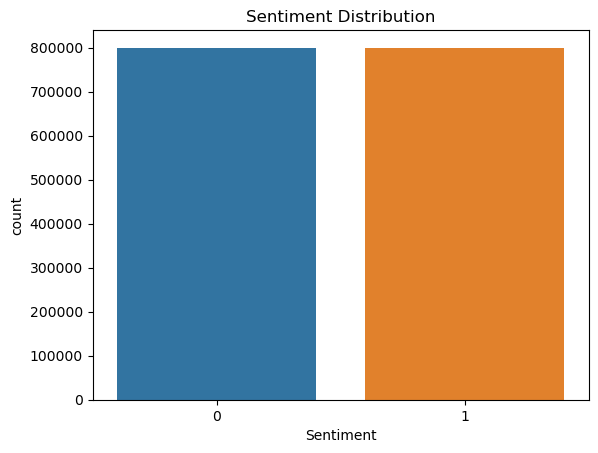

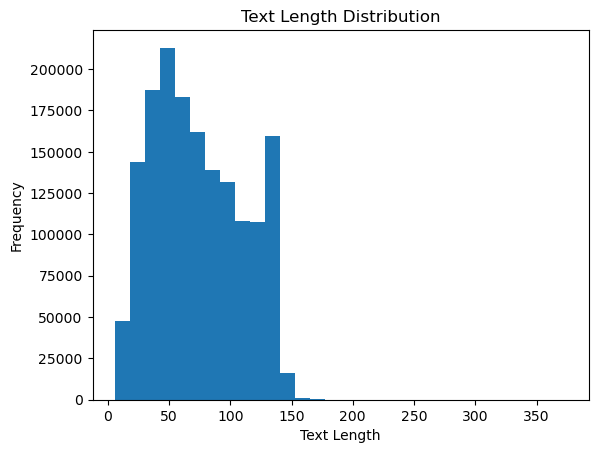

In [3]:

# Check the distribution of sentiments
sns.countplot(x='Sentiment', data=data.replace({4: 1}))
plt.title("Sentiment Distribution")
plt.show()

# Analyze text lengths
data['text_length'] = data['Text'].apply(len)
plt.hist(data['text_length'], bins=30)
plt.title("Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()


## Step 3: Data Cleaning

In [4]:

# Function to clean tweet text
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove @mentions
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Lowercase
    return text

# Apply cleaning
data['clean_text'] = data['Text'].apply(clean_text)
data[['Text', 'clean_text']].head()


,Text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...


## Step 4: Text Preprocessing

In [5]:

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to tokenize, remove stopwords, and lemmatize
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

# Apply preprocessing
data['processed_text'] = data['clean_text'].apply(preprocess_text)
data[['clean_text', 'processed_text']].head()


,clean_text,processed_text
0,awww thats a bummer you shoulda got david ...,awww thats bummer shoulda got david carr third...
1,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...
2,i dived many times for the ball managed to sa...,dived many time ball managed save rest go bound
3,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,no its not behaving at all im mad why am i he...,behaving im mad cant see


## Step 5: Save Processed Data

In [6]:

# Save the processed data for future model training
processed_data = data[['Sentiment', 'processed_text']].replace({4: 1})  # Convert 4 to 1 for binary classification
processed_data.to_csv('processed_sentiment140.csv', index=False)
print("Processed data saved as 'processed_sentiment140.csv'")


Processed data saved as 'processed_sentiment140.csv'
